<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Format-Data-&amp;-add-additional-columns" data-toc-modified-id="Format-Data-&amp;-add-additional-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Format Data &amp; add additional columns</a></span></li><li><span><a href="#EDA---Exploratory-Data-Analysis" data-toc-modified-id="EDA---Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA - Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Basic-data-properties" data-toc-modified-id="Basic-data-properties-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Basic data properties</a></span></li><li><span><a href="#Number-of-goods-vs-bads-(nans-vs-non-nans)" data-toc-modified-id="Number-of-goods-vs-bads-(nans-vs-non-nans)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Number of goods vs bads (nans vs non-nans)</a></span></li></ul></li><li><span><a href="#Plot-Histograms" data-toc-modified-id="Plot-Histograms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot Histograms</a></span></li><li><span><a href="#Fit-Model-A" data-toc-modified-id="Fit-Model-A-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fit Model A</a></span></li><li><span><a href="#Fit-Model-B" data-toc-modified-id="Fit-Model-B-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fit Model B</a></span></li></ul></div>

# Imports

In [1]:
# Imports
import csv
import os
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

# Load data

In [2]:
filename = os.path.join('data','employee_retention_data.csv')
# Load data to pandas
df = pd.read_csv(filename)
df.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


# Format Data & add additional columns

In [3]:
# Convert to date times
df['join_date'] = pd.to_datetime(df['join_date'])
df['quit_date'] = pd.to_datetime(df['quit_date'])

In [4]:
# Add column for still working
df['still_working'] = pd.isnull(df['quit_date'])

In [5]:
# Add a column for quit date_minus join_date
df['duration'] = df['quit_date'] - df['join_date']

# Convert to days
df['duration'] = df['duration'].dt.days

In [6]:
# Add "min" columns
# These columns assume the employee quits on the last day of the data set - 2015/12/13
# These will be used for later analysis

# Add quit_date_min
df['quit_date_min'] = df['quit_date']
df.loc[pd.isnull(df['quit_date']),['quit_date_min']] = pd.to_datetime('2015/12/13')

In [7]:
# Add duration_min
df['duration_min'] = df['quit_date_min'] - df['join_date']

# Convert to days
df['duration_min'] = df['duration_min'].dt.days

In [8]:
# Get rid of this, since we no longer need
df = df.drop('quit_date_min',1)

In [9]:
# Add columns for join year
#df['joined2011']
df['j2011'] = df['join_date'] < pd.to_datetime('2012')
df['j2012'] = (df['join_date'] >= pd.to_datetime('2012')) & (df['join_date'] < pd.to_datetime('2013'))
df['j2013'] = (df['join_date'] >= pd.to_datetime('2013')) & (df['join_date'] < pd.to_datetime('2014'))
df['j2014'] = (df['join_date'] >= pd.to_datetime('2014')) & (df['join_date'] < pd.to_datetime('2015'))
df['j2015'] = (df['join_date'] >= pd.to_datetime('2015')) & (df['join_date'] < pd.to_datetime('2016'))

In [10]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,duration,duration_min,j2011,j2012,j2013,j2014,j2015
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False,585.0,585,False,False,False,True,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False,340.0,340,False,False,True,False,False
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,True,NaN,426,False,False,False,True,False
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False,389.0,389,False,True,False,False,False
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False,1040.0,1040,True,False,False,False,False


# EDA - Exploratory Data Analysis

## Basic data properties

In [11]:
# Data types
print(df.dtypes)

employee_id             float64
company_id                int64
dept                     object
seniority                 int64
salary                  float64
join_date        datetime64[ns]
quit_date        datetime64[ns]
still_working              bool
duration                float64
duration_min              int64
j2011                      bool
j2012                      bool
j2013                      bool
j2014                      bool
j2015                      bool
dtype: object


In [12]:
# Number of unique companies
print('Unique company ids')
print(df.company_id.unique())
print('Number of unqiue companies = {}'.format(str(len(df.company_id.unique()))))

Unique company ids
[ 7  4  2  9  1  6 10  5  3  8 11 12]
Number of unqiue companies = 12


In [13]:
# Number of unique depts
print('Unique company ids')
print(df.dept.unique())
print('Number of unqiue depts = {}'.format(str(len(df.dept.unique()))))

Unique company ids
['customer_service' 'marketing' 'data_science' 'engineer' 'sales' 'design']
Number of unqiue depts = 6


In [14]:
# Number of unique seniority
print('Unique company ids')
print(df.seniority.unique())
print('Number of unqiue seniorities = {}'.format(str(len(df.seniority.unique()))))

Unique company ids
[28 20 14 23 21  4  7 13 17  1 10  6 19 15 26 27  5 18 16 25  9  2 29  3
  8 22 24 12 11 98 99]
Number of unqiue seniorities = 31


In [15]:
# Sort senorities
foo = df.seniority.unique()
foo.sort()

In [16]:
print("Number of years experience when hired, sorted unique values: " + str(foo))

Number of years experience when hired, sorted unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 98 99]


In [17]:
# For some reason, some people hae 98 or 99 years experience? Look at these values...

# experience = 98 - one lucky engineer
df[df['seniority'] == 98]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,duration,duration_min,j2011,j2012,j2013,j2014,j2015
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,False,1123.0,1123,True,False,False,False,False


In [18]:
# experience = 99
df[df['seniority'] == 99]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,duration,duration_min,j2011,j2012,j2013,j2014,j2015
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06,False,864.0,864,True,False,False,False,False


In [19]:
# Replace these values with more reasonable numbers

df = df.replace({'seniority': 98}, 40)
df = df.replace({'seniority': 99}, 40)
# Verify it works
df[24700:24704]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,duration,duration_min,j2011,j2012,j2013,j2014,j2015
24700,97289.0,10,engineer,40,266000.0,2011-12-13,2015-01-09,False,1123.0,1123,True,False,False,False,False
24701,604052.0,1,marketing,40,185000.0,2011-07-26,2013-12-06,False,864.0,864,True,False,False,False,False


## Number of goods vs bads (nans vs non-nans)

In [20]:
# Save dataframs containing only nans and only non-nans
df_good = df.dropna()
df_bad = df[pd.isnull(df['quit_date'])]

In [21]:
df_good.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,duration,duration_min,j2011,j2012,j2013,j2014,j2015
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False,585.0,585,False,False,False,True,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False,340.0,340,False,False,True,False,False
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False,389.0,389,False,True,False,False,False
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False,1040.0,1040,True,False,False,False,False
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,False,578.0,578,False,True,False,False,False


In [22]:
df_bad.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,duration,duration_min,j2011,j2012,j2013,j2014,j2015
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,True,NaN,426,False,False,False,True,False
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaT,True,NaN,783,False,False,True,False,False
7,716309.0,2,customer_service,4,30000.0,2014-03-05,NaT,True,NaN,648,False,False,False,True,False
9,504159.0,1,sales,7,104000.0,2012-06-12,NaT,True,NaN,1279,False,True,False,False,False
11,904158.0,2,marketing,17,230000.0,2015-05-11,NaT,True,NaN,216,False,False,False,False,True


In [23]:
# Lengths
N = len(df)

Ngood = len(df_good)
Nbad2 = N-Ngood
Nbad = len(df_bad)

In [24]:
print('N={}, Ngood={}, Nbad={}, Nbad2={}'.format(str(N),str(Ngood),str(Nbad),str(Nbad2)))

N=24702, Ngood=13510, Nbad=11192, Nbad2=11192


# Plot Histograms

In [25]:
# Copy before messing
df2 = df.copy();

In [26]:
df2.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,still_working,duration,duration_min,j2011,j2012,j2013,j2014,j2015
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False,585.0,585,False,False,False,True,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False,340.0,340,False,False,True,False,False
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,True,NaN,426,False,False,False,True,False
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False,389.0,389,False,True,False,False,False
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False,1040.0,1040,True,False,False,False,False


<Figure size 432x288 with 0 Axes>

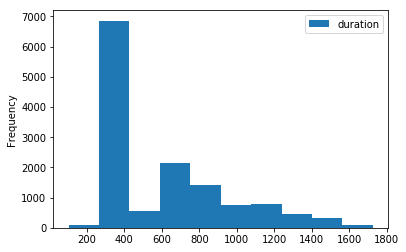

In [27]:
# Plot durations of all still working
foo = df.loc[df['still_working'] == False,['duration']]
plt.figure();
foo.plot.hist();

<Figure size 432x288 with 0 Axes>

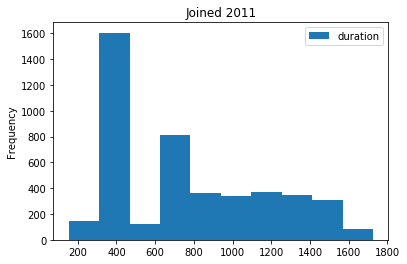

<Figure size 432x288 with 0 Axes>

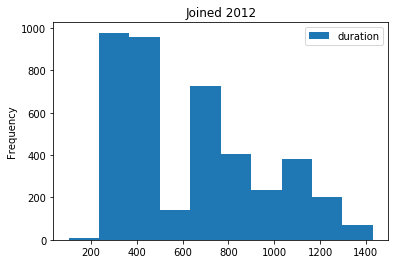

<Figure size 432x288 with 0 Axes>

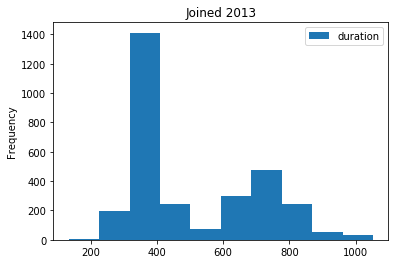

<Figure size 432x288 with 0 Axes>

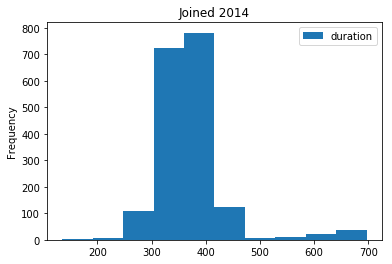

<Figure size 432x288 with 0 Axes>

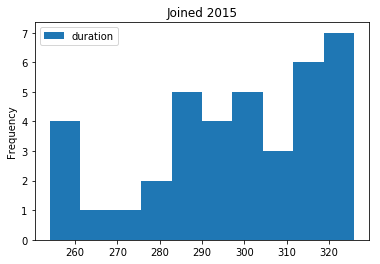

In [28]:
# Joined in 2011
foo = df.loc[(df['still_working'] == False) & (df['j2011']),['duration']]
plt.figure();
foo.plot.hist();
plt.title('Joined 2011');

# Joined in 2012
foo = df.loc[(df['still_working'] == False) & (df['j2012']),['duration']]
plt.figure();
foo.plot.hist();
plt.title('Joined 2012');

# Joined in 2013
foo = df.loc[(df['still_working'] == False) & (df['j2013']),['duration']]
plt.figure();
foo.plot.hist();
plt.title('Joined 2013');

# Joined in 2014
foo = df.loc[(df['still_working'] == False) & (df['j2014']),['duration']]
plt.figure();
foo.plot.hist();
plt.title('Joined 2014');

# Joined in 2015
foo = df.loc[(df['still_working'] == False) & (df['j2015']),['duration']]
plt.figure();
foo.plot.hist();
plt.title('Joined 2015');

In [29]:
# Appears that one group tends to quit after around 300-400 days; some stragglers (long tail)
# The data for employees that join in 2015 is highly biased.

# Fit Model A

In [30]:
# Generate X variable
# Drop columns we don't want to include as regressors
foo = df_good
foo = foo.drop(['employee_id'],1)
foo = foo.drop(['company_id'],1)
foo = foo.drop(['join_date'],1)
foo = foo.drop(['quit_date'],1)
foo = foo.drop(['still_working'],1)
foo = foo.drop(['duration'],1)
foo = foo.drop(['duration_min'],1)
X = foo

# Genreate Y variable
y = pd.DataFrame(df_good['duration_min'])

In [31]:
X.head()

,dept,seniority,salary,j2011,j2012,j2013,j2014,j2015
0,customer_service,28,89000.0,False,False,False,True,False
1,marketing,20,183000.0,False,False,True,False,False
3,customer_service,20,115000.0,False,True,False,False,False
4,data_science,23,276000.0,True,False,False,False,False
5,data_science,14,165000.0,False,True,False,False,False


In [32]:
y.head()

,duration_min
0,585
1,340
3,389
4,1040
5,578


In [33]:
model = LinearRegression()
# model.fit(X,y)

For the next steps, I would convert the dept info to use one hot encoding and run the model.


# Fit Model B

Now that Model A is working (the model trained on just the "good" data - e.g., the data associated with employees who have already quit), I will then train a second model, model B. For this model, I will populate the nan values of the duration column using the following algorithm.

1) For each nan value, use model A to predict the duration
2) If the predicted duration is longer than 2015/12/13 - join_date (e.g. their time worked up until 2015/12/13), I will substitute the nan with the predicted value. If the predicted duration is shorter, I will then use the value 2015/12/13 - join_date. This will partially correct for bias in the model associated with dropping these data points in model A.